In [38]:
import os
import numpy as np
import pandas as pd
import nibabel as nib #Read / write access to some common neuroimaging file formats
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('OASIS_labels.csv')
df.head(5)

,Unnamed: 0,Unnamed: 0.1,subject,file,path,sex
0,0,0,OAS30785,sub-OAS30785_ses-d0096_T1w.nii.gz,./OASIS3/OAS30785_MR_d0096/anat2/NIFTI/sub-OAS...,m
1,1,1,OAS30514,sub-OAS30514_ses-d1526_T1w.nii.gz,./OASIS3/OAS30514_MR_d1526/anat2/NIFTI/sub-OAS...,f
2,2,2,OAS30313,sub-OAS30313_ses-d0048_T1w.nii.gz,./OASIS3/OAS30313_MR_d0048/anat2/NIFTI/sub-OAS...,m
3,3,3,OAS30714,sub-OAS30714_ses-d0444_run-02_T1w.nii.gz,./OASIS3/OAS30714_MR_d0444/anat3/NIFTI/sub-OAS...,f
4,4,4,OAS30714,sub-OAS30714_ses-d0444_run-01_T1w.nii.gz,./OASIS3/OAS30714_MR_d0444/anat2/NIFTI/sub-OAS...,f


In [40]:
brain_files = df['path']
print("Number of brains: ", len(brain_files))
print(brain_files[0])

Number of brains:  666
./OASIS3/OAS30785_MR_d0096/anat2/NIFTI/sub-OAS30785_ses-d0096_T1w.nii.gz


In [41]:
one_brain = np.array(nib.load( brain_files[0] ).get_data())
shape = one_brain.shape
print(one_brain.dtype, one_brain.itemsize)
print(one_brain.size)
print("Brain image shape: ", shape) 

int16 2
11534336
Brain image shape:  (176, 256, 256)


In [42]:
dataset_size = len(brain_files)*one_brain.size*one_brain.itemsize
print("Size =", np.round(dataset_size/1024**3, 2), "GB")

Size = 14.31 GB


In [43]:
brain_shapes = []
errors = []
for brain in brain_files:
    try:
        shape = np.array(nib.load(brain).get_data()).shape
        if shape not in brain_shapes:
            brain_shapes.append(shape)
    except EOFError:
        errors.append(brain)
    except Exception as exception:
        # Output unexpected Exceptions.
        Logging.log_exception(exception, False)
        break
            
print(len(errors))

0


In [44]:
print(brain_shapes)

[(176, 256, 256), (176, 240, 256), (256, 256, 128), (160, 224, 256), (160, 256, 256), (256, 256, 176)]


0     ./OASIS3/OAS30785_MR_d0096/anat2/NIFTI/sub-OAS...
1     ./OASIS3/OAS30514_MR_d1526/anat2/NIFTI/sub-OAS...
2     ./OASIS3/OAS30313_MR_d0048/anat2/NIFTI/sub-OAS...
3     ./OASIS3/OAS30714_MR_d0444/anat3/NIFTI/sub-OAS...
4     ./OASIS3/OAS30714_MR_d0444/anat2/NIFTI/sub-OAS...
5     ./OASIS3/OAS30502_MR_d1195/anat4/NIFTI/sub-OAS...
6     ./OASIS3/OAS30723_MR_d1179/anat3/NIFTI/sub-OAS...
7     ./OASIS3/OAS30767_MR_d0948/anat9/NIFTI/sub-OAS...
8     ./OASIS3/OAS30767_MR_d0948/anat8/NIFTI/sub-OAS...
9     ./OASIS3/OAS30786_MR_d3713/anat4/NIFTI/sub-OAS...
10    ./OASIS3/OAS30742_MR_d0058/anat4/NIFTI/sub-OAS...
11    ./OASIS3/OAS30742_MR_d0058/anat3/NIFTI/sub-OAS...
12    ./OASIS3/OAS30742_MR_d0058/anat5/NIFTI/sub-OAS...
13    ./OASIS3/OAS30719_MR_d1166/anat3/NIFTI/sub-OAS...
14    ./OASIS3/OAS30719_MR_d1166/anat2/NIFTI/sub-OAS...
15    ./OASIS3/OAS30537_MR_d1848/anat4/NIFTI/sub-OAS...
16    ./OASIS3/OAS30720_MR_d0069/anat4/NIFTI/sub-OAS...
17    ./OASIS3/OAS30720_MR_d0069/anat3/NIFTI/sub

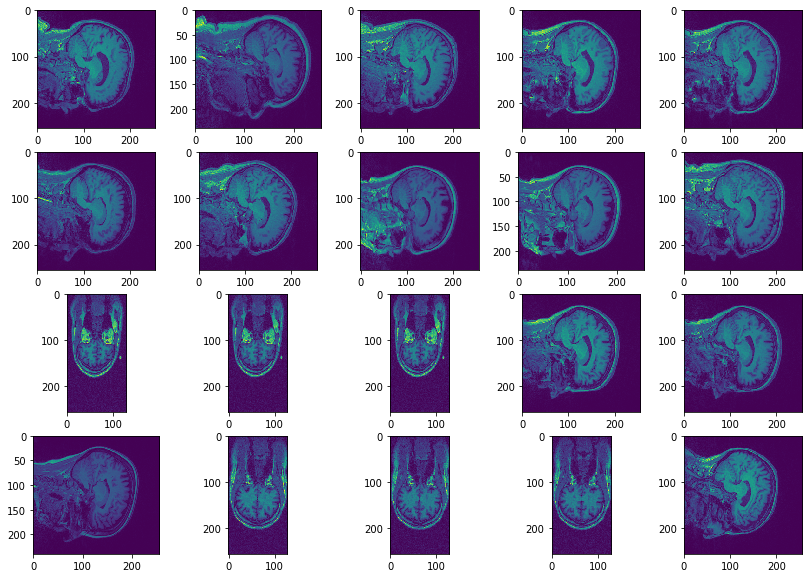

In [23]:
# Load a few brains
num_few = 20
print(brain_files[:num_few])
np_brains = np.array([nib.load( brain ).get_data() for brain in brain_files[:num_few]])

dimension = 0
s = 100
plt.figure(figsize=(14, 10))
for i in range(1, 5*4+1):
    plt.subplot(4,5,i)
    plt.imshow(np.take(np_brains[i-1], s, dimension))
plt.show()

In [24]:
print(errors)

['./OASIS3/OAS30778_MR_d1273/anat2/NIFTI/sub-OAS30778_ses-d1273_run-01_T1w.nii.gz', './OASIS3/OAS30775_MR_d0329/anat2/NIFTI/sub-OAS30775_ses-d0329_run-01_T1w.nii.gz', './OASIS3/OAS30708_MR_d0071/anat4/NIFTI/sub-OAS30708_ses-d0071_T1w.nii.gz', './OASIS3/OAS30777_MR_d0526/anat6/NIFTI/sub-OAS30777_ses-d0526_run-04_T1w.nii.gz', './OASIS3/OAS30748_MR_d0219/anat2/NIFTI/sub-OAS30748_ses-d0219_run-01_T1w.nii.gz', './OASIS3/OAS30506_MR_d1039/anat3/NIFTI/sub-OAS30506_ses-d1039_run-01_T1w.nii.gz', './OASIS3/OAS30718_MR_d5999/anat3/NIFTI/sub-OAS30718_ses-d5999_run-01_T1w.nii.gz', './OASIS3/OAS30524_MR_d0198/anat3/NIFTI/sub-OAS30524_ses-d0198_run-02_T1w.nii.gz', './OASIS3/OAS30502_MR_d0395/anat2/NIFTI/sub-OAS30502_ses-d0395_T1w.nii.gz', './OASIS3/OAS30976_MR_d0065/anat2/NIFTI/sub-OAS30976_ses-d0065_T1w.nii.gz', './OASIS3/OAS30717_MR_d2476/anat5/NIFTI/sub-OAS30717_ses-d2476_T1w.nii.gz', './OASIS3/OAS30907_MR_d0813/anat2/NIFTI/sub-OAS30907_ses-d0813_run-01_T1w.nii.gz', './OASIS3/OAS30725_MR_d0160/ana

In [34]:
del_indexs

[27,
 131,
 273,
 278,
 285,
 299,
 309,
 311,
 328,
 335,
 388,
 404,
 450,
 482,
 506,
 519,
 527,
 553,
 560,
 568,
 627,
 639]

In [32]:
del_indexs = [df.loc[df['path'] == error].index[0] for error in errors]

In [36]:
new_df = df.drop(index=del_indexs)

In [37]:
new_df.to_csv("OASIS_labels.csv", sep=',')

In [45]:
with open('preprocess.txt', 'w') as f:
    for item in new_df['path']:
        f.write("%s\n" % item)